In [1]:
import sys
sys.version

'3.8.19 (default, Mar 20 2024, 19:55:45) [MSC v.1916 64 bit (AMD64)]'

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [3]:
data_dir = "data/PdM/"

df_mst = pd.read_csv(data_dir + "ics_asset_mst.csv", na_values='\\N')
df_sigdata = pd.read_csv(data_dir + "ics_asset_sigdata.csv", na_values='\\N')
df_status_hist = pd.read_csv(data_dir + "ics_asset_status_hist.csv", na_values='\\N')

df_mst.columns = ['ASSET_ID', 'ASSET_NAME', 'SENSOR_NUMBER']
df_sigdata.columns = ['asset_id', 'created_at',	'temperature', 'voltage',
                      'rms_x', 'rms_y', 'rms_z', 'rms_xyz', 'vel_rms_x', 'vel_rms_y', 'vel_rms_z', 'vel_rms_xyz',
                      'skewness_x', 'skewness_y', 'skewness_z', 'vel_skewness_x', 'vel_skewness_y', 'vel_skewness_z',
                      'kurtosis_x', 'kurtosis_y', 'kurtosis_z', 'vel_kurtosis_x', 'vel_kurtosis_y', 'vel_kurtosis_z',
                      'crest_factor_x', 'crest_factor_y', 'crest_factor_z', 'vel_crest_factor_x', 'vel_crest_factor_y', 'vel_crest_factor_z',
                      'peak_x', 'peak_y', 'peak_z', 'vel_peak_x', 'vel_peak_y', 'vel_peak_z',
                      'peak2peak_x', 'peak2peak_y', 'peak2peak_z', 'vel_peak2peak_x', 'vel_peak2peak_y', 'vel_peak2peak_z']
df_status_hist.columns = ['asset_id', 'time', 'imbalance_health', 'misalignment_health', 'looseness_health', 'bearing_health', 'asset_health', 'CRT_DT']

In [4]:
df_sigdata.describe()

,created_at,temperature,voltage,rms_x,rms_y,rms_z,rms_xyz,vel_rms_x,vel_rms_y,vel_rms_z,...,peak_z,vel_peak_x,vel_peak_y,vel_peak_z,peak2peak_x,peak2peak_y,peak2peak_z,vel_peak2peak_x,vel_peak2peak_y,vel_peak2peak_z
count,1.121730e+05,112173.000000,112173.000000,112173.000000,112173.000000,112173.000000,112173.000000,112173.000000,112173.000000,112173.000000,...,112173.000000,112173.000000,112173.000000,112173.000000,112173.000000,112173.000000,112173.000000,112173.000000,112173.000000,112173.000000
mean,1.713673e+09,26.853040,3.017462,0.136202,0.133719,0.081675,0.214898,1.415655,1.572012,1.053232,...,0.311863,4.447616,4.734928,3.157348,1.009733,0.988147,0.589160,8.330995,8.875131,5.906835
std,5.873303e+06,8.059273,0.076381,0.186251,0.186492,0.107323,0.279120,2.278250,2.506496,1.863919,...,0.399961,6.343423,6.877668,4.709614,1.425231,1.383250,0.751381,11.826192,12.781508,8.728461
min,1.704035e+09,4.000000,2.485840,0.010948,0.010557,0.016231,0.024047,0.134617,0.128920,0.193689,...,0.058958,0.400247,0.419661,0.645560,0.076172,0.076172,0.117188,0.784232,0.833947,1.200460
25%,1.708630e+09,21.000000,2.974840,0.017395,0.017120,0.021396,0.032740,0.293723,0.294505,0.381787,...,0.085001,0.931718,0.936670,1.195400,0.128906,0.123047,0.158203,1.740430,1.749980,2.239110
50%,1.713256e+09,27.000000,3.045770,0.051649,0.055623,0.037722,0.094030,0.474648,0.495127,0.487964,...,0.142332,1.599470,1.668080,1.599710,0.369141,0.398438,0.269531,3.003030,3.131460,2.976380
75%,1.718567e+09,33.000000,3.074790,0.174825,0.209780,0.092772,0.309854,1.849460,1.840110,0.965546,...,0.369415,6.064550,6.123120,3.169550,1.277340,1.435550,0.703125,11.496900,11.562400,5.957810
max,1.724676e+09,50.000000,3.261790,2.127820,5.099800,1.941900,5.442020,25.459900,56.767300,41.440600,...,6.683500,74.977400,311.591000,164.862000,23.994100,23.994100,12.474600,141.623000,583.048000,279.158000


In [12]:
df_status_hist.describe()

,imbalance_health,misalignment_health,looseness_health,bearing_health,asset_health
count,7379.000000,7379.000000,7379.000000,7379.000000,7756.000000
mean,0.996967,0.999251,0.999342,0.999992,0.961719
std,0.028073,0.007697,0.006352,0.000332,0.093149
min,0.117298,0.710014,0.665808,0.981219,0.000000
25%,1.000000,1.000000,1.000000,1.000000,0.964925
50%,1.000000,1.000000,1.000000,1.000000,0.997458
75%,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
df_plot = df_sigdata.loc[(df_sigdata['asset_id'] == '5398c2fd-1393-4d0c-a4a3-68806f1d1d43'), ['created_at', 'voltage', 'temperature']]
df_plot

,created_at,voltage,temperature
34076,1704041422,3.03610,20
34077,1704048629,3.03610,19
34078,1704055832,3.03825,19
34079,1704063040,3.03610,19
34080,1704070243,3.03610,21
...,...,...,...
36936,1724646243,2.99526,43
36937,1724653451,2.99633,43
36938,1724660654,2.99633,42
36939,1724667863,2.99418,42


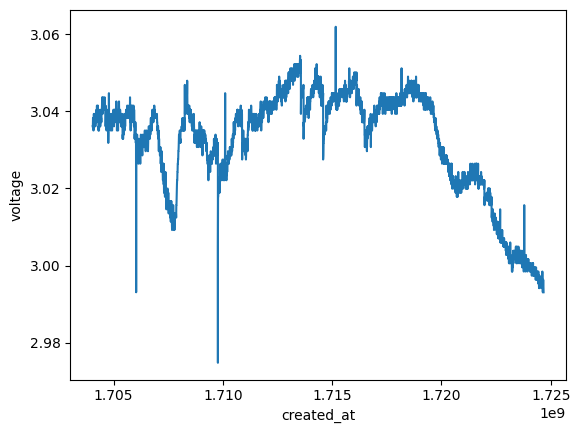

In [6]:
plt.plot(df_plot['created_at'], df_plot['voltage'])
plt.xlabel('created_at')
plt.ylabel('voltage')
plt.title('')
plt.show()

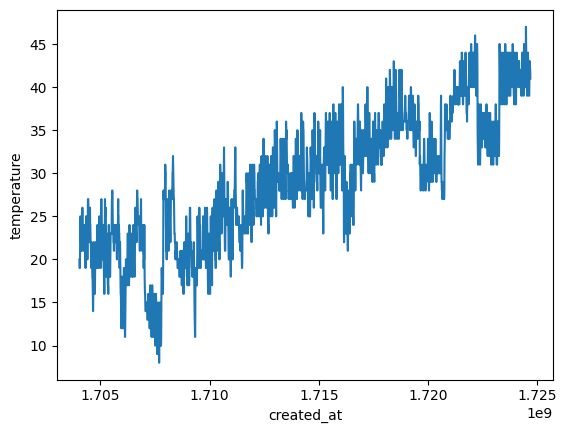

In [7]:
plt.plot(df_plot['created_at'], df_plot['temperature'])
plt.xlabel('created_at')
plt.ylabel('temperature')
plt.title('')
plt.show()

In [10]:
df_sigdata.isna().sum()

asset_id              0
created_at            0
temperature           0
voltage               0
rms_x                 0
rms_y                 0
rms_z                 0
rms_xyz               0
vel_rms_x             0
vel_rms_y             0
vel_rms_z             0
vel_rms_xyz           0
skewness_x            0
skewness_y            0
skewness_z            0
vel_skewness_x        0
vel_skewness_y        0
vel_skewness_z        0
kurtosis_x            0
kurtosis_y            0
kurtosis_z            0
vel_kurtosis_x        0
vel_kurtosis_y        0
vel_kurtosis_z        0
crest_factor_x        0
crest_factor_y        0
crest_factor_z        0
vel_crest_factor_x    0
vel_crest_factor_y    0
vel_crest_factor_z    0
peak_x                0
peak_y                0
peak_z                0
vel_peak_x            0
vel_peak_y            0
vel_peak_z            0
peak2peak_x           0
peak2peak_y           0
peak2peak_z           0
vel_peak2peak_x       0
vel_peak2peak_y       0
vel_peak2peak_z 

In [11]:
df_status_hist.isna().sum()

asset_id                  0
time                      0
imbalance_health       3761
misalignment_health    3761
looseness_health       3761
bearing_health         3761
asset_health           3384
CRT_DT                    0
dtype: int64